In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set paths
data_path = "../data/interim/soil_sample_small.csv"

# Load dataset
df = pd.read_csv(data_path)
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (620, 5)


,N,P,K,pH,EC
0,131,61,181,7.1,0.11
1,171,21,250,4.9,2.09
2,161,57,186,5.8,0.93
3,160,52,66,6.2,0.17
4,137,74,188,6.1,0.57


In [2]:
# Get summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
N,620.0,135.701613,31.808083,30.00,116.0000,138.00,160.00,198.00
P,620.0,52.508065,24.673538,10.00,30.0000,54.00,75.00,100.00
K,620.0,161.401613,81.285780,51.00,89.0000,157.50,206.00,369.00
pH,620.0,6.106290,0.693782,4.50,5.7000,6.10,6.50,8.00
EC,620.0,0.885468,0.637214,0.01,0.2975,0.78,1.39,2.48


In [3]:
# Check data types
print(df.dtypes)

# Check for null values
print("\nMissing values:\n", df.isnull().sum())


N       int64
P       int64
K       int64
pH    float64
EC    float64
dtype: object

Missing values:
 N     0
P     0
K     0
pH    0
EC    0
dtype: int64


In [4]:
for col in ['N', 'P', 'K', 'pH', 'EC']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)
print("\nAfter conversion, missing values:\n", df.isnull().sum())


N       int64
P       int64
K       int64
pH    float64
EC    float64
dtype: object

After conversion, missing values:
 N     0
P     0
K     0
pH    0
EC    0
dtype: int64


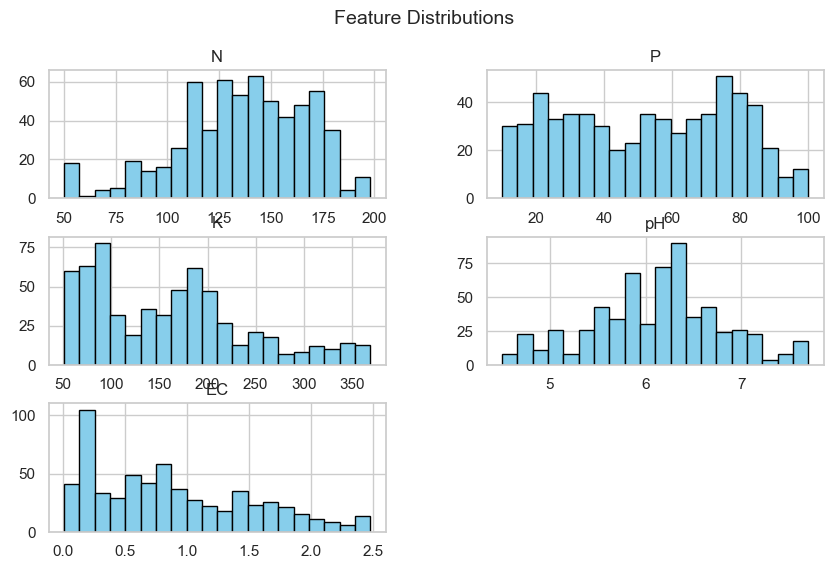

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df.hist(figsize=(10,6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


In [9]:
import numpy as np

for col in ['N', 'P', 'K', 'pH', 'EC']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

print("✅ Outliers capped successfully!")


✅ Outliers capped successfully!


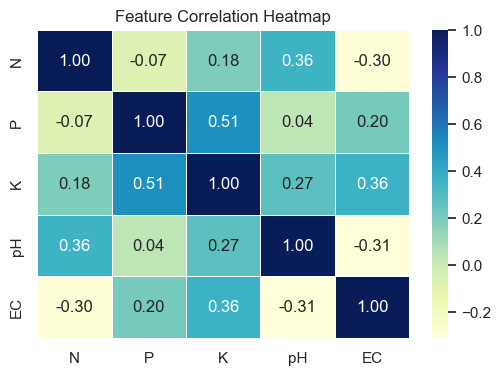

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
import os

output_path = "../data/clean/soil_data_final.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)

print(f"✅ Final cleaned dataset saved to: {output_path}")
print("Final shape:", df.shape)


✅ Final cleaned dataset saved to: ../data/clean/soil_data_final.csv
Final shape: (620, 5)
